<h1 style='text-align:center'> ----------------------AI CA4----------------------- </h1>

<p style='text-align: right;direction: rtl'> هدف از این پروژه آشنایی با دیتاست ها و روش های visualize و پیش پردازش دیتاست برای رسیدن به نتایج بهتر، آشنایی با تعدادی از مدل های یادگیری ماشین فردی و گروهی که در کتابخانه scikit learn قرار دارند و همچنین نحوه جداسازی داده train و valid و در نهایت تنظیم درست هایپرپارامترها در مدل های پیاده سازی شده برای رسیدن به معیارهای نهایی مطلوب تر است.  

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import countplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
import math

### Phase 0

In [104]:
train=pd.read_csv('train.csv')
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<p style='text-align: right;direction: rtl'> (1) ابتدا دیتاست را از فایل می خوانیم و در دیتافریم ذخیره می کنیم. سپس به کمک describe اطلاعات پایه مانند میانگین و مینیمم و ماکسیمم را برای ستون های عددی نمایش می دهیم و به وسیله info اطلاعاتی مثل تعداد سطرهای non-null و نوع داده های هر ویژگی را به دست می آوریم تا درک بهتری از دیتاست پیدا کنیم. </p>

In [106]:
print('Percent of missed data for each feature in train-set:\n')
for feature in train:
    print(feature,'-->',(len(train)-len(train[train[feature].notna()]))*100/len(train),'%')

Percent of missed data for each feature in train-set:

Id --> 0.0 %
MSSubClass --> 0.0 %
MSZoning --> 0.0 %
LotFrontage --> 17.73972602739726 %
LotArea --> 0.0 %
Street --> 0.0 %
Alley --> 93.76712328767124 %
LotShape --> 0.0 %
LandContour --> 0.0 %
Utilities --> 0.0 %
LotConfig --> 0.0 %
LandSlope --> 0.0 %
Neighborhood --> 0.0 %
Condition1 --> 0.0 %
Condition2 --> 0.0 %
BldgType --> 0.0 %
HouseStyle --> 0.0 %
OverallQual --> 0.0 %
OverallCond --> 0.0 %
YearBuilt --> 0.0 %
YearRemodAdd --> 0.0 %
RoofStyle --> 0.0 %
RoofMatl --> 0.0 %
Exterior1st --> 0.0 %
Exterior2nd --> 0.0 %
MasVnrType --> 0.547945205479452 %
MasVnrArea --> 0.547945205479452 %
ExterQual --> 0.0 %
ExterCond --> 0.0 %
Foundation --> 0.0 %
BsmtQual --> 2.5342465753424657 %
BsmtCond --> 2.5342465753424657 %
BsmtExposure --> 2.6027397260273974 %
BsmtFinType1 --> 2.5342465753424657 %
BsmtFinSF1 --> 0.0 %
BsmtFinType2 --> 2.6027397260273974 %
BsmtFinSF2 --> 0.0 %
BsmtUnfSF --> 0.0 %
TotalBsmtSF --> 0.0 %
Heating --> 0.0 %


<p style='text-align: right;direction: rtl'> (2) دراین قسمت درصد داده های گمشده برای ویژگی های مختلف را چاپ می کنیم. البته باید توجه کرد که این درصدها واقعی نیستند چون بعضی از ویژگی ها میتوانند مقدار مجاز NA را بپذیرند که در اینجا به اشتباه داده گمشده تشخیص داده میشود ولی در فاز بعد این موضوع را هندل  کرده و درصدهای واقعی را چاپ می کنیم. </p>

In [107]:
train.corr().style.background_gradient(cmap='coolwarm')

<p style='text-align: right;direction: rtl'> (3)در نمودار وابستگی بالا ضریب همبستگی ویژگی های عددی را نسبت به هم مشاهده می کنیم. ضرایب قطر اصلی 1 هستند چون هر ویژگی با خودش همبستگی کامل دارد. ویژگی هایی که بیشترین ضریب همبستگی با قیمت خانه دارند برای تخمین قیمت خانه مفیدترین هستند. 6 تا مفیدترین ها به ترتیب از چپ به راست عبارتنداز: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF </p> 

In [108]:
train_logprice=train.copy()
train_logprice['SalePrice']=np.log10(train_logprice['SalePrice'])
train_logprice.corr().style.background_gradient(cmap='coolwarm')

<p style='text-align: right;direction: rtl'>  (4) نمودار قسمت 3 را پس از گرفتن لگاریتم از قیمت خانه ها دوباره رسم کردیم. این بار قدرمطلق ضرایب همبستگی قیمت خانه با سایر ویژگی ها افزایش یافته است و همبستگی ها بهتر معلوم است. علت این است که اختلاف قیمت خانه ها ها می تواند بسیار زیاد باشد و رابطه ای نزدیک به نمایی با سایر ویژگی ها داشته باشد ولی با لگاریتم گرفتن این تغییرات کم شده و به رابطه ای تقریبا خطی با سایر ویژگی ها می رسیم که همبستگی قیمت خانه با سایر ویژگی ها را بهتر نشان می دهد. </p> 

<p style='text-align: right;direction: rtl'> (5) سوال 3 برای بررسی تمام ویژگی ها کافی نیست. چون فقط ویژگی های عددی را بررسی می کند؛ حال آنکه ممکن است از بین سایر ویژگی ها، ویژگی های مهم و بهتری برای تخمین قیمت خانه ها وجود داشته باشند. </p>

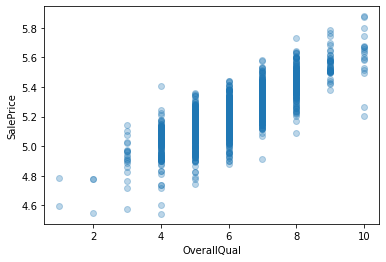

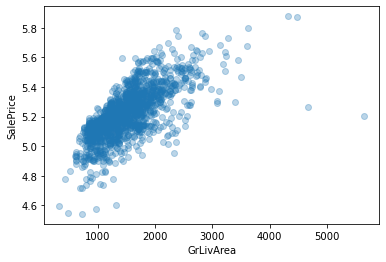

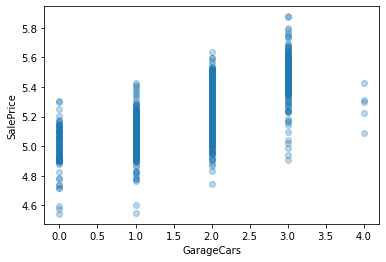

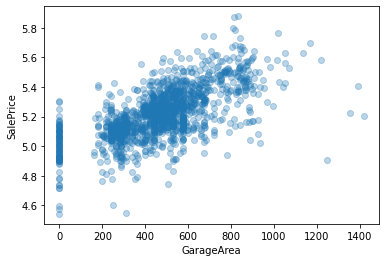

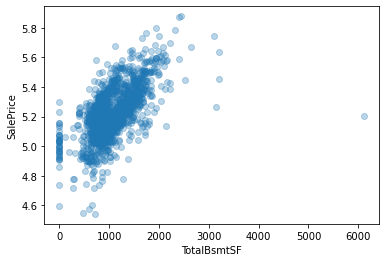

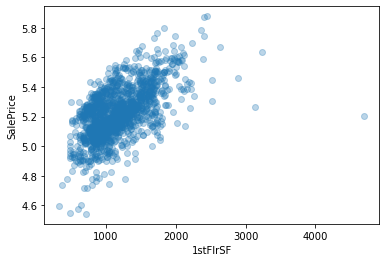

In [109]:
train=train_logprice       #for better peformance use log of house-prices
for feature in ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']:
    plt.scatter(train[feature],train['SalePrice'],alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

<p style='text-align: right;direction: rtl'> (6)  نمودارهای بالا همگی تقریبا صعودی اند(در نقاط پررنگ تر تراکم داده ها بیشتر است) یعنی با افزایش مقدار این ویژگی ها قیمت واقعی خانه ها معمولا افزایش می یابد. پس این ویژگی ها در تخمین قیمت خانه بسیار مفیدند.</p>  

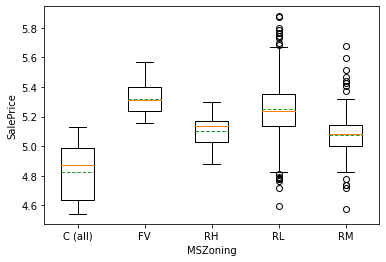

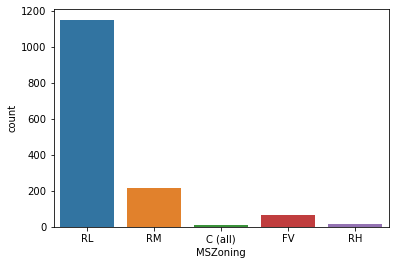

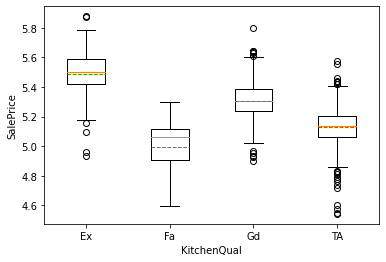

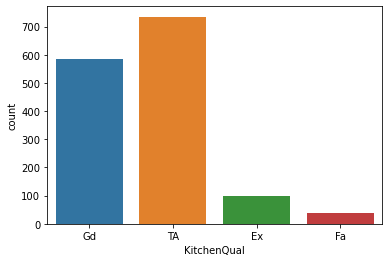

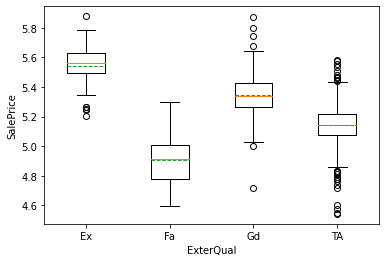

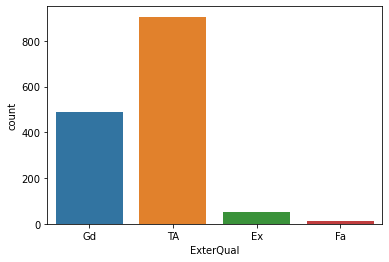

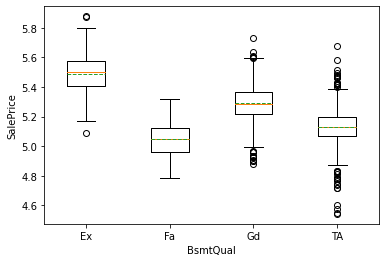

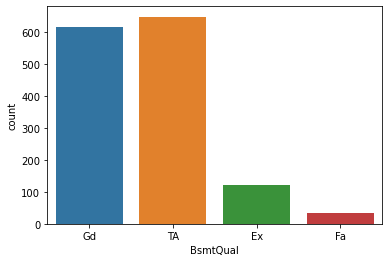

In [110]:
for feature in ['MSZoning', 'KitchenQual', 'ExterQual', 'BsmtQual']:
    feature_plot=[]
    feature_categories=pd.Categorical(train[feature]).categories
    for category in feature_categories:
        feature_plot.append(train.loc[train[feature]==category,'SalePrice'])
    plt.boxplot(feature_plot,labels=feature_categories,meanline=True,showmeans=True)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    countplot(x=train[feature])
    plt.show()
    print()

<p style='text-align: right;direction: rtl'> (7)  از بین ویژگی های دسته ای آنهایی مفیدترند که اولا داده ها در دسته های مختلفشان تقسیم شده باشند(اکثر داده ها در یک دسته نباشد) ثانیا دسته هایشان خانه های با رنج قیمت های مختلف را در بربگیرد که این را به وسیله میانگین گیری از قیمت خانه هایی که در آن دسته قرار دارند متوجه میشویم. همچنین برای فهمیدن میانه و پراکندگی داده های هر دسته ازنمودارجعبه ای استفاده میکنیم. در نمودار خط چین های سبز بیانگر میانگین و خط های نارنجی بیانگر میانه داده های آن دسته است. </p>

### Phase 1

<p style='text-align: right;direction: rtl'> (1) <img src='https://dev.acquia.com/sites/default/files/image1_7.png' width='400'/> برای حل مشکل داده های گمشده علاوه بر حذف کل ستون یا استفاده از داده های آماری مانند میانگین و میانه که ساده پیاده سازی میشوند، روش های دیگری هم وجود دارد که بسته به شرایط می توانند بهتر یا بدتر عمل کنند. از جمله: 
    Regression Imputation: رگرسیون روشی آماری است که رابطه بین متغیر وابسته و متغیرهای مستقل را نشان می دهد. در این روش داریم y = a0 + a1*x1 + ...+ an*xn که در آن xها متغیرهای مستقل اند و y متغیر وابسته(هدف) است که می خواهیم سطرهای گمشده اش را جایگزین کنیم.
<img src='https://dev.acquia.com/sites/default/files/image3_7.png' width='400'/>
Stochastic Regression Imputation: این روش همانند روش قبل است فقط برای حفظ تنوع داده ها مقداری خطا به مقدار y محاسبه شده اضافه میشود. این خطا از یک توزیع نرمال با میانگین صفر و انحراف معیار نزدیک به انحراف معیار x پیروی می کند. <img src='https://dev.acquia.com/sites/default/files/image2_9.png' width='400'/>
Multiply-Stochastic Regression Imputation: همان Stochastic Regression Imputation است ولی برای چند بار اجرا میشود و در نهایت میانگین نتایج به عنوان نتیجه نهایی اعلام میشود. و نسبت به Singly Stochastic Regression Imputation بهتر است چون تخمین بهتری از واریانس داده ها انجام می دهد.
<a href='https://dev.acquia.com/blog/how-to-handle-missing-data-in-machine-learning-5-techniques/09/07/2018/19651'> reference</a> </p>

In [111]:
#handle missing data
for feature in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']:
    train.loc[train[feature].isnull(),feature]='N'
print('Percent of real missed data for each feature in train-set:\n')
for feature in train:
    print(feature,'-->',(len(train)-len(train[train[feature].notna()]))*100/len(train),'%')
    if train[feature].dtype!='object':
        Mean=train[feature].mean()
        train.loc[train[feature].isnull(),feature]=Mean
    else:
        Mode=train[feature].mode()[0]
        train.loc[train[feature].isnull(),feature]=Mode

Percent of real missed data for each feature in train-set:

Id --> 0.0 %
MSSubClass --> 0.0 %
MSZoning --> 0.0 %
LotFrontage --> 17.73972602739726 %
LotArea --> 0.0 %
Street --> 0.0 %
Alley --> 0.0 %
LotShape --> 0.0 %
LandContour --> 0.0 %
Utilities --> 0.0 %
LotConfig --> 0.0 %
LandSlope --> 0.0 %
Neighborhood --> 0.0 %
Condition1 --> 0.0 %
Condition2 --> 0.0 %
BldgType --> 0.0 %
HouseStyle --> 0.0 %
OverallQual --> 0.0 %
OverallCond --> 0.0 %
YearBuilt --> 0.0 %
YearRemodAdd --> 0.0 %
RoofStyle --> 0.0 %
RoofMatl --> 0.0 %
Exterior1st --> 0.0 %
Exterior2nd --> 0.0 %
MasVnrType --> 0.547945205479452 %
MasVnrArea --> 0.547945205479452 %
ExterQual --> 0.0 %
ExterCond --> 0.0 %
Foundation --> 0.0 %
BsmtQual --> 0.0 %
BsmtCond --> 0.0 %
BsmtExposure --> 0.0 %
BsmtFinType1 --> 0.0 %
BsmtFinSF1 --> 0.0 %
BsmtFinType2 --> 0.0 %
BsmtFinSF2 --> 0.0 %
BsmtUnfSF --> 0.0 %
TotalBsmtSF --> 0.0 %
Heating --> 0.0 %
HeatingQC --> 0.0 %
CentralAir --> 0.0 %
Electrical --> 0.0684931506849315 %
1stFlrS

<p style='text-align: right;direction: rtl'> (2) مطابق سوال2 فاز0 ویژگی هایی مثل Alley, PoolQC, Fence, MiscFeature بیشترین میزان داده گمشده را دارند اما واقعا اینطور نیست چون در این ویژگی ها یکی از مقادیر می تواند NA باشد و این به معنی داده گمشده نیست پس نباید این ویژگی ها را حذف کرد بلکه مقدار NA در این ویژگی ها باید با مقداری دیگر جایگزین شود. اما در حالت کلی اگر ویژگی ای درصد داده های گمشده اش زیاد باشد باید حذف شود. در این دیتاست اکثر مقادیر NA به دلیل مذکور می باشند و ویژگی ای وجود ندارد که به علت درصد بالای داده گمشده بتوان آن را حذف کرد. حال ابتدا مقادیر NA را برای ویژگی های مذکور برای تمایز با N جایگزین می کنیم و دوباره درصد داده های واقعا گمشده را برای هر ویژگی نشان می دهیم. سپس تمام داده های گمشده برای ستون های عددی را با میانگین آن ویژگی و برای ستون های دسته ای با مود آن ویژگی جایگزین می کنیم.</p> 

<p style='text-align: right;direction: rtl'> (3) Standardizing و Normalizing هردو یک هدف دارند تمام ویژگی ها را در یک range نهایی  scale میکنند. اگر هیچکدام را انجام ندهیم چون ویژگی ها واحد های متفاوتی دارند و مقادیر قابل قبول آنها میتواند بسیار متفاوت از سایر ویژگی ها باشد، در بعضی مدل ها به یک اندازه تاثیر نمی گذارند و ویژگی های با مقادیر بزرگ با وزن بیشتری تاثیر میگذارند که مطلوب نیست. دراین پروژه به علت تفاوت زیادی که در مقادیر و مقیاس های ویژگی های مختلف دیتاست وجود دارد، نرمال سازی یا استانداردسازی لازم است. نرمالیزیشن را در مرحله بعد پس از انکودینگ ویژگی های دسته ای انجام می دهیم تا روی همه اعمال شود.</p> 

In [112]:
#ordinal encoding
train.replace({'Street':{'Grvl':1, 'Pave':2}, 'Utilities':{'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub': 4}, 'ExterQual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'ExterCond':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'BsmtQual':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)
train.replace({'BsmtCond':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'BsmtExposure':{'N':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5} ,'BsmtFinType1':{'N':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}, 'BsmtFinType2':{'N':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}},inplace=True)
train.replace({'HeatingQC':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'Functional':{'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8,}, 'KitchenQual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'FireplaceQu':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'GarageFinish':{'N':1, 'Unf':2, 'RFn':3, 'Fin':4}},inplace=True)
train.replace({'GarageQual':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'GarageCond':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'PavedDrive':{'N':1, 'P':2, 'Y':3}, 'PoolQC':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'Fence':{'N':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5}},inplace=True)

In [113]:
#one-hot encoding
feature_categories={}
for feature in train:
    if train[feature].dtype=='object':
        feature_categories[feature]=[]
        category_index=0
        categories=pd.Categorical(train[feature]).categories
        category_counts=train[feature].value_counts()
        for category in categories:
            train[feature+'-'+category]=(train[feature]==category).astype(int)
            feature_categories[feature].append(feature+'-'+category)
            category_index+=1
        del train[feature]

<p style='text-align: right;direction: rtl'> (4) برای انکودینگ داده های دسته ای بسته به نوعشان روش های مختلفی وجود دارد. برای ویژگی هایی که ترتیب خاصی دارند(مثل ضعیف-متوسط-عالی) میتوان به هرسطح یک عدد نسبت داد مثلا ضعیف: 1 و متوسط: 2 و ... . برای ویژگی های اسمی که ترتیب خاصی ندارند میتوان از one-hot استفاده کرد. یعنی برای هر ویژگی به ازای تمام دسته هایش یک ویژگی یا ستون به دیتاست اضافه کنیم و برای هر سطر آن دسته ای را که در ویژگی سابق به آن تعلق داشت،  در نظر گرفته و برای آن دسته مقدار یک و برای سایر دسته ها مقدار صفر بگذاریم. این روش عیب بزرگی دارد و آن هم این است که چون به ازای تمام دسته های ویژگی هایی که داده گمشده دارند یک ستون به دیتاست اضافه میشود، میتواند دیتاست را بسیار بزرگ و مصرف حافظه و زمان را زیاد کند. برای رفع این مشکل میتوان برای دسته هایی از یک ویژگی که تعداد کمی داده دارند یک ستون به نام other در نظرگرفت که به علت کم کردن دقت در استفاده از other و زیاد نبودن تعداد این ویژگی ها از other استفاده نمی کنیم. دراین مرحله ویژگی هایی را که می توانیم به روش ordinal و سایر ویژگی های دسته ای را به روش one-hot انکود می کنیم.</p> 

In [114]:
#correlation matrix after encoding(because some categorical features have encoded ordinal)
train.loc[:,:'SalePrice'].corr().style.background_gradient(cmap='coolwarm')

In [115]:
correlations=train.loc[:,:'SalePrice'].corr()['SalePrice']
train['SalePrice']=train.pop('SalePrice')

In [116]:
target_mean=train['SalePrice'].mean()         #for inverse transform in target prediction
target_std=train['SalePrice'].std()
target_min=train['SalePrice'].min()
target_max=train['SalePrice'].max()
for feature in train:
    if train[feature].dtype!='object':
        #train[feature]=(train[feature]-train[feature].min())/(train[feature].max()-train[feature].min())     #normalize
        train[feature]=(train[feature]-train[feature].mean())/train[feature].std()     #standardize

In [117]:
good_features=list(correlations[:-1][correlations[:-1]>=0.55].index)
for feature in ['MSZoning', 'Neighborhood', 'CentralAir']:
    good_features.extend(feature_categories[feature])
print('good_features=',good_features)
for feature in train:
    if not (feature in good_features+['SalePrice']):
        del train[feature]
train

good_features= ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars', 'GarageArea', 'MSZoning-C (all)', 'MSZoning-FV', 'MSZoning-RH', 'MSZoning-RL', 'MSZoning-RM', 'Neighborhood-Blmngtn', 'Neighborhood-Blueste', 'Neighborhood-BrDale', 'Neighborhood-BrkSide', 'Neighborhood-ClearCr', 'Neighborhood-CollgCr', 'Neighborhood-Crawfor', 'Neighborhood-Edwards', 'Neighborhood-Gilbert', 'Neighborhood-IDOTRR', 'Neighborhood-MeadowV', 'Neighborhood-Mitchel', 'Neighborhood-NAmes', 'Neighborhood-NPkVill', 'Neighborhood-NWAmes', 'Neighborhood-NoRidge', 'Neighborhood-NridgHt', 'Neighborhood-OldTown', 'Neighborhood-SWISU', 'Neighborhood-Sawyer', 'Neighborhood-SawyerW', 'Neighborhood-Somerst', 'Neighborhood-StoneBr', 'Neighborhood-Timber', 'Neighborhood-Veenker', 'CentralAir-N', 'CentralAir-Y']


,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,...,Neighborhood-SWISU,Neighborhood-Sawyer,Neighborhood-SawyerW,Neighborhood-Somerst,Neighborhood-StoneBr,Neighborhood-Timber,Neighborhood-Veenker,CentralAir-N,CentralAir-Y,SalePrice
0,0.651256,1.050634,0.878367,1.051942,0.582968,-0.459145,-0.793162,0.370207,0.789470,0.735742,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,0.559876
1,-0.071812,0.156680,-0.429430,-0.689368,0.582968,0.466305,0.257052,-0.482347,0.789470,-0.770827,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,11.473319,-0.263722,0.263722,0.212692
2,0.651256,0.984415,0.829930,1.051942,0.582968,-0.313261,-0.627611,0.514836,0.789470,0.735742,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,0.733795
3,0.651256,-1.862993,-0.720051,-0.689368,-0.557961,-0.687089,-0.521555,0.383528,-1.025689,0.735742,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,-0.437232
4,1.374324,0.951306,0.733056,1.051942,0.582968,0.199611,-0.045596,1.298881,0.789470,0.735742,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,1.014303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071812,0.918196,0.733056,-0.689368,0.582968,-0.238040,-0.542249,0.250316,0.789470,-0.770827,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,0.121392
1456,-0.071812,0.222899,0.151813,-0.689368,0.582968,1.104547,2.354894,1.061003,0.789470,-0.770827,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,0.577822
1457,0.651256,-1.002149,1.023678,2.793251,-0.557961,0.215567,0.065634,1.569110,0.789470,0.735742,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,1.174306
1458,-0.794879,-0.704164,0.539309,-0.689368,-0.557961,0.046889,-0.218907,-0.832502,-1.025689,0.735742,...,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099,-0.263722,0.263722,-0.399519


<p style='text-align: right;direction: rtl'> (5) دراینجا می توانیم فقط ویژگی های مفید در تخمین قیمت خانه ها را نگه داریم و مابقی ویژگی ها را حذف کنیم چون کاربردی در تخمین قیمت ندارند. برای انتخاب ویژگی های مفید در که در مدل های نهایی استفاده شوند، پس از انکودینگ از بین ویژگی های عددی(شامل ویژگی های دسته ای اولیه که به روش ordinal انکود شده اند) آنهایی را که در نمودار همبستگی ضریب همبستگی حداقل 0.55 با قیمت خانه دارند، انتخاب می کنیم که این 0.55 هم بنا به تجربه و عملکرد مدل های نهایی به دست آمده است. همچنین از داده های دسته ای که به صورت one-hot انکود شده اند سه ویژگی انتخاب می کنیم.'MSZoning' که در فاز 0 هم تاثیر مثبتش را دیدیم و 'Neighborhood' و 'CentralAir' که هرسه تاثیر مثبتی در عملکرد مدل های پیاده سازی شده دارند. 

In [118]:
x=train[good_features]
y=train['SalePrice']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

<p style='text-align: right;direction: rtl'> (6) مقدار مناسب p به دیتاست و مسئله بستگی دارد ولی معمولا مقدار نسبتا بزرگی بالای 0.5 انتخاب می شود تا مدل به اندازه کافی  train شود. همچنین p باید به گونه ای انتخاب شود که train set و valid set نماینده ای از دیتاست اصلی باشند. همچنین از random_state=42 استفاده کردیم که 42 seed تابع رندم برای تفکیک valid و train است. اینجا p=0.7 در نظر گرفتیم. یکی از روش های دیگر برای جداسازی valid و train روش k-fold cross-validation است که بیشتر زمانی کاربرد دارد که دیتاست به اندازه کافی بزرگ نیست. در این روش دیتاست به k گروه تقسیم می شود و k بار ارزیابی صورت می گیرد به طوری که درهر ارزیابی گروه iام به عنوان validation و گروه های دیگر به عنوان train درنظر گرفته می شوند و درآخر بین این k ارزیابی میانگین گرفته می شود. تقسیم دیتاست باید تصادفی باشد چون ممکن است مثلا داده های شبیه هم پشت سر هم باشند و بدون تصادفی بودن همگی در valid یا train می افتند که مطلوب نیست و قدرت پیش بینی مدل را تحت تاثیر منفی قرار می دهد.</p>

### Phase 2

In [119]:
def Evaluate(x_valid, y_valid, x_train, y_train, model):
    #valid
    predicted_y_valid = model.predict(x_valid)
    #real_predicted_y_valid = 10 ** (predicted_y_valid * (target_max - target_min) + target_min)     #for normalized data
    #real_y_valid = 10 ** (y_valid * (target_max - target_min) + target_min)
    real_predicted_y_valid = 10 ** (predicted_y_valid * target_std + target_mean)    #for standardized data
    real_y_valid = 10 ** (y_valid * target_std + target_mean)
    valid_MAE=np.mean(abs(real_predicted_y_valid - real_y_valid))
    valid_RMSE=math.sqrt(np.mean((real_predicted_y_valid - real_y_valid) **2))
    valid_score=model.score(x_valid, y_valid)

    #train
    predicted_y_train = model.predict(x_train)
    #real_predicted_y_train = 10 ** (predicted_y_train * (target_max - target_min) + target_min)    #for normalized data
    #real_y_train = 10 ** (y_train * (target_max - target_min) + target_min)
    real_predicted_y_train = 10 ** (predicted_y_train * target_std + target_mean)     #for standardized data
    real_y_train = 10 ** (y_train * target_std + target_mean)
    train_MAE=np.mean(abs(real_predicted_y_train - real_y_train))
    train_RMSE=math.sqrt(np.mean((real_predicted_y_train - real_y_train) **2))
    train_score=model.score(x_train, y_train)
    
    return valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score

In [120]:
def PrintModelResult(valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score, model):
    print(model,':\n',sep='')
    print('Validation:\nMAE=',valid_MAE)
    print('RMSE=',valid_RMSE)
    print('Score=',valid_score,'\n')
    print('Train:\nMAE=',train_MAE)
    print('RMSE=',train_RMSE)
    print('Score=',train_score,'\n')

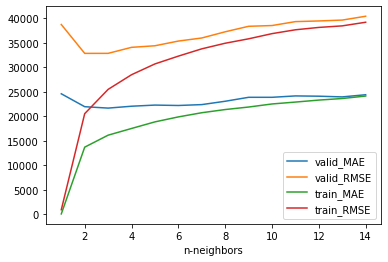

KNeighborsRegressor(n_neighbors=2):

Validation:
MAE= 21953.490989714588
RMSE= 32839.327569996916
Score= 0.8343352226329018 

Train:
MAE= 13694.218126745853
RMSE= 20530.76676525488
Score= 0.9244220471672164 



In [121]:
#K-Nearest Neighbour
knn = KNeighborsRegressor()
valid_MAEs, valid_RMSEs, train_MAEs, train_RMSEs=[],[],[],[]
values=list(range(1,15))
best_valid_RMSE=float('inf')
for value in values:
    knn.set_params(n_neighbors=value)
    knn.fit(x_train, y_train)
    valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score=Evaluate(x_valid, y_valid, x_train, y_train, knn)
    valid_MAEs.append(valid_MAE)
    valid_RMSEs.append(valid_RMSE)
    train_MAEs.append(train_MAE)
    train_RMSEs.append(train_RMSE)
    if valid_RMSE<best_valid_RMSE:
        best_valid_RMSE=valid_RMSE
        best_n_neighbors=value
plt.plot(values, valid_MAEs, label='valid_MAE')
plt.plot(values, valid_RMSEs, label='valid_RMSE')
plt.plot(values, train_MAEs, label='train_MAE')
plt.plot(values, train_RMSEs, label='train_RMSE')
plt.xlabel('n-neighbors')
plt.legend()
plt.show()

knn.set_params(n_neighbors=best_n_neighbors)
knn.fit(x_train, y_train)
valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score=Evaluate(x_valid, y_valid, x_train, y_train, knn)
PrintModelResult(valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score, knn)

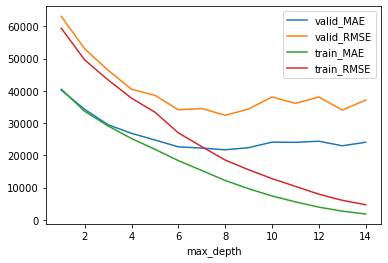

DecisionTreeRegressor(max_depth=8, random_state=42):

Validation:
MAE= 21742.53667856961
RMSE= 32420.999390942077
Score= 0.8176849298110153 

Train:
MAE= 12238.842967995757
RMSE= 18573.465661189064
Score= 0.9425051228718639 



In [122]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
valid_MAEs, valid_RMSEs, train_MAEs, train_RMSEs=[],[],[],[]
values=list(range(1,15))
best_valid_RMSE=float('inf')
for value in values:
    dt.set_params(max_depth=value)
    dt.fit(x_train, y_train)
    valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score=Evaluate(x_valid, y_valid, x_train, y_train, dt)
    valid_MAEs.append(valid_MAE)
    valid_RMSEs.append(valid_RMSE)
    train_MAEs.append(train_MAE)
    train_RMSEs.append(train_RMSE)
    if valid_RMSE<best_valid_RMSE:
        best_valid_RMSE=valid_RMSE
        best_max_depth=value
plt.plot(values, valid_MAEs, label='valid_MAE')
plt.plot(values, valid_RMSEs, label='valid_RMSE')
plt.plot(values, train_MAEs, label='train_MAE')
plt.plot(values, train_RMSEs, label='train_RMSE')
plt.xlabel('max_depth')
plt.legend()
plt.show()

dt.set_params(max_depth=best_max_depth)
dt.fit(x_train, y_train)
valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score=Evaluate(x_valid, y_valid, x_train, y_train, dt)
PrintModelResult(valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score, dt)

In [123]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score=Evaluate(x_valid, y_valid, x_train, y_train, lr)
PrintModelResult(valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score, lr)

LinearRegression():

Validation:
MAE= 18024.193352176797
RMSE= 27462.830706242185
Score= 0.8887973006871626 

Train:
MAE= 18603.59809929633
RMSE= 34127.4595191083
Score= 0.8592114076606527 



<p style='text-align: right;direction: rtl'> (1) معیارهای MAE و RMSE و Score در Validation, Train Data برای هر مدل با بهترین مقدار هایپرپارامتر چاپ شده است</p>

<p style='text-align: right;direction: rtl'> (2) نمودار تغییرات MAE و RMSE در Validation, Train Data برحسب هایپرپارامتر برای دو مدل  KNN و Decision Tree رسم شده است.</p> 

<p style='text-align: right;direction: rtl'> (3) underfitting زمانی اتفاق می افتد که مدل به اندازه کافی train نشده است و نتوانسته است روال کلی داده ها را تشخیص دهد. overfitting زمانی رخ می دهد که الگوریتم برای زمان زیادی اجرا شده و مدل بیش از حد train شده است به طوری که به جای روال کلی داده ها نقاط داده های train را دقیق تشخیص می دهد. هردوی اینها باعث از بین رفتن generalization در مدل و پیش بینی های غیر قابل اتکا می شوند. در مدل های KNN و Decision Tree نمودار معیارها را بر اساس هایپرپارامتر رسم کردیم و هایپرپارامتر را به گونه ای انتخاب کردیم که این معیارها روی داده validation بهترین مقدار خود را داشته باشند و با این کار جلوی underfitting و overfitting را تاحد خوبی گرفتیم. ولی در مدل Linear Regression تا حدی underfitting رخ داده است چون مقدار معیارها روی train data بیش از حد مطلوب است به طوری که معیارها روی validation data بهتر هستند. </p>

<p style='text-align: right;direction: rtl'> (4) روش های مختلف هندل کردن داده های گمشده تاثیر چندانی در معیارها ندارند چون اولا داده های گمشده واقعی در دیتاست زیاد نیستند دوما اکثر ویژگی هایی که در تخمین قیمت استفاده شده اند داده های گمشده کمی دارند. Standardization و Normalization فقط در پیش بینی دومدل اول تاثیر دارد و در مدل Linear Regressor   به علت خطی بودن مدل و اینکه دو عملیات مذکور هم خطی هستند کاملا بی تاثیر است. در دو مدل اول به وسیله  Standardization نسبت به Normalization نتایج بهتری به دست می آید. همچنین Normalization  از هیچی بهتر است. انکودینگ داده های دسته ای و استفاده از آنها در معیارهای نهایی تاثیر بسزایی دارد و مقادیر RMSE و MAE را بسیار بهتر میکند. انتخاب درست و بادقت featureها بسیار مهم است. اگر feature های مفید انتخاب نشوند یا حتی اگر feature های اضافی و غیرمفید انتتخاب شوند معیارهای دقت افت می کنند. تمام ویژگی های محتملا مفید تست شده و سعی شده است بهترین ویژگی ها انتخاب شوند. تفکیک درست و با درصد مناسب داده های valid و train بسیار مهم و تاثیرگذار است. از روش k-fold استفاده نکردیم چون دیتاست به اندازه کافی بزرگ است و بنا به تشخیص لازم نبود. بنا به معیارهای اندازه گیری شده درصد داده های train  را 0.7 اانتخاب کردیم تا برای اکثر مدل های پیاده سازی شده معیارها به بهترین مقدار خود برسند. همچنین درجداسازی random_state=42 درنظر گرفتیم که نتایج بسیار مطلوبی می دهد به طوری که اگر به جای 42 عدد نامناسبی بگذاریم یا None بگذاریم تا عددی تصادفی به عنوان seed انتخاب شود احتمال افت معیارها زیاد می شود. همچنین مزیت دیگر تعیین seed این است که با هربار اجرای کد داده های valid و train تغییر نمی کنند و معیارهای خروجی برای valid , trainیکسان و قابل بهینه سازی هستند. همچنین در decision tree و random forest به دلایل مذکور از random_state=42 استفاده کردیم. همچنین از لگاریتم قیمت خانه ها برای آموزش مدل ها استفاده کردیم چون بدون لگاریتم فقط روی داده valid و فقط در مدل KNN کمی نتایج بهتری به دست می آید ولی در سایر موارد معیارها و امتیازات به شدت افت می کنند.   </p>

### Phase 3

In [148]:
# Random Forest
rf=RandomForestRegressor(random_state=42)
valid_MAEs, valid_RMSEs, train_MAEs, train_RMSEs=[],[],[],[]
param_grid={'n_estimators':list(range(111,144,3)), 'max_depth':list(range(8,14))}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1)
grid_search.fit(x_train,y_train)
best_rf = grid_search.best_estimator_
valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score = Evaluate(x_valid, y_valid, x_train, y_train, best_rf)
PrintModelResult(valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score, best_rf)

RandomForestRegressor(max_depth=12, n_estimators=126, random_state=42):

Validation:
MAE= 17001.749787930166
RMSE= 26173.909179620277
Score= 0.8802554131076437 

Train:
MAE= 8059.847549191386
RMSE= 13124.092552930766
Score= 0.9747715607280449 



<p style='text-align: right;direction: rtl'> (1) در این قسمت از random forest استفاده می کنیم و برای hyperparameter tuning از ابزار GridSearch استفاده میکنیم که بهینه ترین هایپرپارامترها را از بین ترکیب های معین شده برای دو هایپرپارامتر n_estimators و max_depth به دست آوریم و سپس مدل را اجرا و معیار ها را به دست می آوریم.</p>

In [141]:
#Voting Regression
vr = VotingRegressor([('knn',knn),('dt',dt),('lr',lr)])
vr.fit(x_train,y_train)
valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score = Evaluate(x_valid, y_valid, x_train, y_train, vr)
PrintModelResult(valid_MAE, valid_RMSE, valid_score, train_MAE, train_RMSE, train_score, vr)

VotingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=2)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=8,
                                                   random_state=42)),
                            ('lr', LinearRegression())]):

Validation:
MAE= 17281.815161341685
RMSE= 26141.67419236866
Score= 0.892966093302791 

Train:
MAE= 12424.007402302426
RMSE= 18748.14936012949
Score= 0.9430916019625526 



<p style='text-align: right;direction: rtl'> (2)  در این قسمت براساس سه مدل فاز قبل مدل  voting regression را می سازیم و معیارهای دقت را به دست می آوریم</p>

<p style='text-align: right;direction: rtl'> (3) معیار ها و امتیاز به دست آمده از مدل voting regression بسیار بهتر از مدل های فردی است مثلا مقدار RMSE روی validation data در مدل های KNN و Des Tree و Lin Reg به ترتیب 32839، 32420 و 27462 می باشد ولی در مدل voting reg 26141 می باشد یا مقدار MAE روی validation data در مدل های KNN و Des Tree و Lin Reg به ترتیب 21953، 21742 و 18024 می باشد ولی در مدل voting reg 17281 می باشد. همچنین در مورد امتیاز همین گونه است. همین حرف برای random forest نسبت به decision tree صادق است. پس بنا به تجربه معمولا مدل های یادگیری گروهی از مدل های فردی بهتر عمل می کنند. 

<h3 style='text-align:center'> ----------------------Test----------------------- </h3>

In [142]:
test=pd.read_csv('test.csv')

In [143]:
#handle missing data
for feature in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']:
    test.loc[test[feature].isnull(),feature]='N'
print('Percent of real missed data for each feature in test-set:\n')
for feature in test:
    print(feature,'-->',(len(test)-len(test[test[feature].notna()]))*100/len(test),'%')
    if test[feature].dtype!='object':
        Mean=test[feature].mean()
        test.loc[test[feature].isnull(),feature]=Mean
    else:
        Mode=test[feature].mode()[0]
        test.loc[test[feature].isnull(),feature]=Mode

Percent of real missed data for each feature in test-set:

Id --> 0.0 %
MSSubClass --> 0.0 %
MSZoning --> 0.27416038382453733 %
LotFrontage --> 15.558601782042494 %
LotArea --> 0.0 %
Street --> 0.0 %
Alley --> 0.0 %
LotShape --> 0.0 %
LandContour --> 0.0 %
Utilities --> 0.13708019191226867 %
LotConfig --> 0.0 %
LandSlope --> 0.0 %
Neighborhood --> 0.0 %
Condition1 --> 0.0 %
Condition2 --> 0.0 %
BldgType --> 0.0 %
HouseStyle --> 0.0 %
OverallQual --> 0.0 %
OverallCond --> 0.0 %
YearBuilt --> 0.0 %
YearRemodAdd --> 0.0 %
RoofStyle --> 0.0 %
RoofMatl --> 0.0 %
Exterior1st --> 0.06854009595613433 %
Exterior2nd --> 0.06854009595613433 %
MasVnrType --> 1.0966415352981493 %
MasVnrArea --> 1.0281014393420151 %
ExterQual --> 0.0 %
ExterCond --> 0.0 %
Foundation --> 0.0 %
BsmtQual --> 0.0 %
BsmtCond --> 0.0 %
BsmtExposure --> 0.0 %
BsmtFinType1 --> 0.0 %
BsmtFinSF1 --> 0.06854009595613433 %
BsmtFinType2 --> 0.0 %
BsmtFinSF2 --> 0.06854009595613433 %
BsmtUnfSF --> 0.06854009595613433 %
TotalBsmtS

In [144]:
#ordinal encoding
test.replace({'Street':{'Grvl':1, 'Pave':2}, 'Utilities':{'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub': 4}, 'ExterQual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'ExterCond':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'BsmtQual':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)
test.replace({'BsmtCond':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'BsmtExposure':{'N':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5} ,'BsmtFinType1':{'N':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}, 'BsmtFinType2':{'N':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}},inplace=True)
test.replace({'HeatingQC':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'Functional':{'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8,}, 'KitchenQual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 'FireplaceQu':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'GarageFinish':{'N':1, 'Unf':2, 'RFn':3, 'Fin':4}},inplace=True)
test.replace({'GarageQual':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'GarageCond':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'PavedDrive':{'N':1, 'P':2, 'Y':3}, 'PoolQC':{'N':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}, 'Fence':{'N':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5}},inplace=True)

In [145]:
#one-hot encoding
feature_categories={}
for feature in test:
    if test[feature].dtype=='object':
        feature_categories[feature]=[]
        category_index=0
        categories=pd.Categorical(test[feature]).categories
        category_counts=test[feature].value_counts()
        for category in categories:
            test[feature+'-'+category]=(test[feature]==category).astype(int)
            feature_categories[feature].append(feature+'-'+category)
            category_index+=1
        del test[feature]

In [146]:
for feature in test:
    if test[feature].dtype!='object':
        #test[feature]=(test[feature]-test[feature].min())/(test[feature].max()-test[feature].min())     #normalize
        test[feature]-=test[feature].mean()
        if test[feature].std()!=0:
            test[feature]/=test[feature].std()     #standardize

In [147]:
x_test=test[good_features]
predicted_y_test = best_rf.predict(x_test)
real_predicted_y_test = 10 ** (predicted_y_test * target_std + target_mean)
pd.DataFrame({'Id':list(range(1461,2920)),'SalePrice':real_predicted_y_test}).to_csv('submission.csv',index=False)

<p style='text-align: right;direction: rtl'> در اینجا مراحل پیش پردازش را روی داده تست انجام دادیم و قیمت خانه ها را توسط مدل random forest به دست آمده از فاز 3 پیش بینی و در فایل .csv ذخیره کردیم. پس از آپلود فایل در مسابقه امتیاز(خطا) 0.15550 حاصل شد. </p>